# Another explanation about PCA


<img src = './images/pca.jpeg' width="width" height="height"/>
<sub>photo credit: Raunak Joshi</sub>




In this lab, we are going to view another explanation about Principal Component Analysis(PCA). PCA is a statistical technique invented in 1901 by Karl Pearson that uses **orthogonal transformations** to **map a set of variables into a set of linearly uncorrelated variables called Principal Components**. 

* PCA is based on the **Singular Value Decomposition (SVD) of the Covariance Matrix** of the original dataset.
* The **Eigenvectors** of such decomposition are used as a **rotation matrix**. 
* The Eigenvectors are **arranged in the rotation matrix in decreasing order according to its explained variance**. 
* This last term is related to the **EigenValues** of the SVD.

PCA is a potent technique with applications ranging from
* simple **space transformation**,
* **dimensionality reduction**, and
* **mixture separation** from spectral information.

Follow this lab to view another explanation for PCA. In this case, we are going to use the concept of **rotation matrices applied to correlated random data**, just as illustrated in the next picture.

<img src=./images/GaussianScatterPCA.svg>

Source: https://en.wikipedia.org/wiki/Principal_component_analysis

As usual, we must import the libraries that will use in this lab.

In [1]:
import numpy as np                         # Linear algebra library
import matplotlib.pyplot as plt            # library for visualization
from sklearn.decomposition import PCA      # PCA library
import pandas as pd                        # Data frame library
import math                                # Library for math functions
import random                              # Library for pseudo random numbers

To start, let us consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated to each other since y is just a scaling of x.

In [2]:
np.random.uniform(1,2,1000)

array([1.98692758, 1.91981025, 1.16773387, 1.89312174, 1.3668007 ,
       1.70971148, 1.94678343, 1.3608718 , 1.42163918, 1.75476073,
       1.55231098, 1.60703076, 1.86540172, 1.15982691, 1.49815426,
       1.88543137, 1.70815824, 1.82484792, 1.60763838, 1.63480796,
       1.52347396, 1.49690808, 1.17455813, 1.89672378, 1.104452  ,
       1.89166741, 1.04437542, 1.7920945 , 1.5075946 , 1.44275152,
       1.62919386, 1.12097975, 1.74228417, 1.74465405, 1.56050494,
       1.50919585, 1.66314439, 1.51503706, 1.58664104, 1.61584532,
       1.08345656, 1.39750421, 1.09521009, 1.73119406, 1.74954473,
       1.38935567, 1.81725954, 1.68229604, 1.06154597, 1.9956782 ,
       1.5342253 , 1.48042587, 1.71746737, 1.76348004, 1.30291736,
       1.67434478, 1.09545567, 1.47174854, 1.90125922, 1.80044371,
       1.83624622, 1.52497253, 1.97089186, 1.39132343, 1.73103838,
       1.32585521, 1.48677145, 1.00935966, 1.42882037, 1.92614246,
       1.10352053, 1.79036275, 1.79075036, 1.89346224, 1.24060

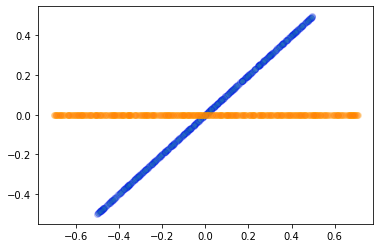

In [7]:
# Step 1 - generate random variables
np.random.seed(1)
n = 1  # The amount of the correlation
x = np.random.uniform(1,2,1000) # Generate 1000 samples from a uniform random variable
y = x.copy() * n # Make y = n * x

# Step 2 - center the data
# PCA works better if the data is centered
x = x - np.mean(x) # Center x. Remove its mean
y = y - np.mean(y) # Center y. Remove its mean

# Step 3 - Create df, plot points
data = pd.DataFrame({'x': x, 'y': y}) # Create a data frame with x and y
plt.scatter(data.x, 
            data.y, 
            edgecolors='blue',
            alpha = 0.1) # Plot the original correlated data in blue


#Step 4 - PCA, df, plot points
pca = PCA(n_components=2) # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally, it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data) # Transform the data based on the rotation matrix of pcaTr
# # Create a data frame with the new variables. We call these new variables PC1 and PC2
dataPCA = pd.DataFrame(data = rotatedData, 
                       columns = ['PC1', 'PC2']) 

# Plot the transformed data in orange
plt.scatter(dataPCA.PC1, 
            dataPCA.PC2,
            edgecolors = 'orange',
            alpha = 0.1)
plt.show()

In [8]:
pcaTr

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Now, what is the direction in which the variables point?

## Understanding the transformation model pcaTr

As mentioned before, a PCA model is composed of a rotation matrix and its corresponding explained variance. In the next module, we will explain the details of the rotation matrices. 

* `pcaTr.components_` has the rotation matrix 
* `pcaTr.explained_variance_` has the explained variance of each principal component

In [9]:
print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)


Eigenvectors or principal component: First row must be in the direction of [1, n]
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]

Eigenvalues or explained variance
[1.66465230e-01 4.66587934e-33]


$cos(45^o) = 0.7071$

The rotation matrix is equal to:

$$R = \begin{bmatrix} cos(45^o) & sin(45^o) \\ -sin(45^o) & cos(45^o) \end{bmatrix}$$ 

And $45^o$ is the same angle that form the variables y = 1 * x.

Then, PCA has identified the angle in which point the original variables.

And the explained Variance is around [0.166 0]. Remember that the Variance of a uniform random variable x ~ U(1, 2), as our x and y, is equal to:

$$Var(x) = \frac {(2 - 1)^2}{12} = 0.083333$$
    
Then the explained variance given by the PCA can be interpret as

$$[Var(x) + Var(y),  \ 0] = [0.0833 + 0.0833, \ 0] = [0.166, \ 0]$$

Which means that all the explained variance of our new system is explained by our first principal component. 


## Correlated Normal Random Variables.

Now, we will use a controlled dataset composed of 2 random variables with different variances and with a specific Covariance among them. The only way I know to get such a dataset is, 
* first, create **two independent Normal random variables with the desired variances** and 
* then **combine them using a rotation matrix**. 

In this way, the new resulting variables will be a **linear combination of the original random variables** and thus be **dependent and correlated.**

angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


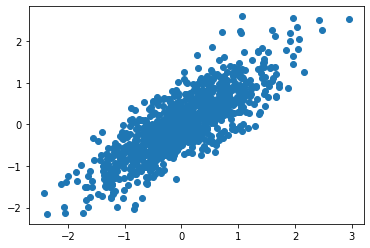

In [10]:
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

# ====Step 1 - Normal distribution parameters====
np.random.seed(100)

std1 = 1     # The desired standard deviation of our first random variable
std2 = 0.333 # The desired standard deviation of our second random variable


# ====Step 2 - Generate random variables, center values====
x = np.random.normal(0, std1, 1000) # Get 1000 samples from x ~ N(0, std1)
y = np.random.normal(0, std2, 1000)  # Get 1000 samples from y ~ N(0, std2)
#y = y + np.random.normal(0,1,1000)*noiseLevel * np.sin(0.78)

# PCA works better if the data is centered
x = x - np.mean(x) # Center x 
y = y - np.mean(y) # Center y


# ====Step 3 - Artificially create a rotation matrix====
#Define a pair of dependent variables with a desired amount of covariance
n = 1 # Magnitude of covariance. 
angle = np.arctan(1 / n) # Convert the covariance to an angle
print('angle: ',  angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)],
                 [-np.sin(angle), np.cos(angle)]])


print('rotationMatrix')
print(rotationMatrix)


# ====Step 4 - Create xy, transform xy, scatterplot====
xy = np.concatenate(([x] , [y]), axis=0).T # Create a matrix with columns x and y

# Transform the data using the rotation matrix. It correlates the two variables
data = np.dot(xy, rotationMatrix) # Return a nD array

# Print the rotated data
plt.scatter(data[:,0], data[:,1])
plt.show()

Let us print the original and the resulting transformed system using the result of the PCA in the same plot alongside with the 2 Principal Component vectors in red and blue

Eigenvectors or principal component: First row must be in the direction of [1, n]
[[ 0.70827652  0.7059351 ]
 [-0.7059351   0.70827652]]

Eigenvalues or explained variance
[1.09488457 0.11243237]


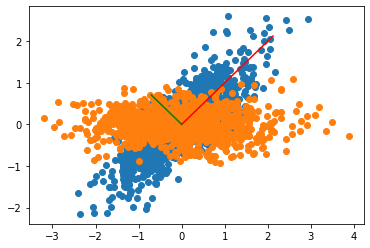

In [11]:
# ====Step 1 - Transformed dataset scatterplot====
plt.scatter(data[:,0], data[:,1]) # Print the original data in blue


# ====Step 2 - PCA====
# Apply PCA. In theory, the Eigenvector matrix must be the 
# inverse of the original rotationMatrix. 
pca = PCA(n_components=2)  # Instantiate a PCA. Choose to get 2 output variables

# Create the transformation model for this data. Internally it gets the rotation 
# matrix and the explained variance
pcaTr = pca.fit(data)

# Create an array with the transformed data
dataPCA = pcaTr.transform(data)

print('Eigenvectors or principal component: First row must be in the direction of [1, n]')
print(pcaTr.components_)

print()
print('Eigenvalues or explained variance')
print(pcaTr.explained_variance_)


# ====Step 3 - Scatterplot of PCA components====
# Print the rotated data
plt.scatter(dataPCA[:,0], dataPCA[:,1])

# Plot the first component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[0][0] * std1 * 3], 
         [0, rotationMatrix[0][1] * std1 * 3], 
         'k-', 
         color='red')
# Plot the second component axe. Use the explained variance to scale the vector
plt.plot([0, rotationMatrix[1][0] * std2 * 3], 
         [0, rotationMatrix[1][1] * std2 * 3], 
         'k-', 
         color='green')

plt.show()

The explanation of this chart is as follows:
* The rotation matrix used to create our correlated variables **took the original uncorrelated variables `x` and `y` and transformed them into the blue points**.
* The **PCA** transformation **finds out the rotation matrix** used to create our correlated variables (blue points). Using the PCA model to transform our data, puts back the variables as our **original uncorrelated variables.**
* The **explained Variance of the PCA** is 

$$[1.0094, 0.1125] $$

which is approximately

$$[1, 0.333 * 0.333] = [std1^2, std2^2],$$

the parameters of our original random variables x and y

You can use the previous code to try with other standard deviations and correlations and convince yourself of this fact.   

## PCA as a strategy for dimensionality reduction

The principal components contained in the rotation matrix, are decreasingly sorted depending on its explained Variance. It usually means that the first components retain most of the power of the data to explain the patterns that **generalize** the data. Nevertheless, **for some applications, we are interested in the patterns that explain much less Variance, for example, in <ins>novelty detection</ins>**. 

In the next figure, we can see the original data and its corresponding projection over the first and second principal components. In other words, data comprised of a single variable.

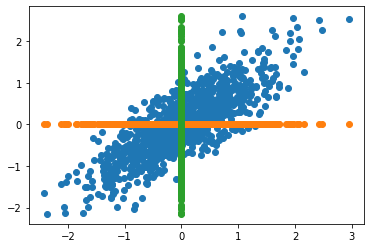

In [12]:
nPoints = len(data)

# Plot the original DATA (TRANSFORMED BY THE ROTATION MATRIX) in blue
plt.scatter(data[:,0], data[:,1])

#Plot the PROJECTION along the first component in orange
plt.scatter(data[:,0], np.zeros(nPoints))

#Plot the PROJECTION along the second component in green
plt.scatter(np.zeros(nPoints), data[:,1])

plt.show()

## PCA as a strategy to plot complex data

The next chart shows a sample diagram displaying a dataset of pictures of cats and dogs. Raw pictures are composed of hundreds or even thousands of features. However, PCA allows us to reduce that many features to only two. In that reduced space of uncorrelated variables, we can easily separate cats and dogs. 

<img src = './images/catdog.png'>

You will learn how to generate a chart like this with word vectors in this week's programming assignment.